In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps
import numpy as np

### Load Data

In [50]:
#Load .csv & exclude aggregated footer data
#url = 'https://data.london.gov.uk/download/london-borough-profiles/c1693b82-68b1-44ee-beb2-3decf17dc1f8/london-borough-profiles.csv'
#df =  pd.read_csv(url,encoding='ANSI',skipfooter=5,engine='python',na_values=['.', 'n/a'])
df = pd.read_csv('london-borough-profiles.csv',
                 skipfooter=5, engine='python',
                 na_values=['.', 'n/a'])
df.head()

,Code,Area_name,Inner/_Outer_London,GLA_Population_Estimate_2017,GLA_Household_Estimate_2017,Inland_Area_(Hectares),Population_density_(per_hectare)_2017,"Average_Age,_2017","Proportion_of_population_aged_0-15,_2015","Proportion_of_population_of_working-age,_2015",...,Happiness_score_2011-14_(out_of_10),Anxiety_score_2011-14_(out_of_10),Childhood_Obesity_Prevalance_(%)_2015/16,People_aged_17+_with_diabetes_(%),Mortality_rate_from_causes_considered_preventable_2012/14,Political_control_in_council,Proportion_of_seats_won_by_Conservatives_in_2014_election,Proportion_of_seats_won_by_Labour_in_2014_election,Proportion_of_seats_won_by_Lib_Dems_in_2014_election,Turnout_at_2014_local_elections
0,E09000001,City of London,Inner London,8800,5326,290,30.3,43.2,11.4,73.1,...,6.0,5.6,NaN,2.6,129,NaN,NaN,NaN,NaN,NaN
1,E09000002,Barking and Dagenham,Outer London,209000,78188,"3,611",57.9,32.9,27.2,63.1,...,7.1,3.1,28.5,7.3,228,Lab,0.0,100.0,0.0,36.5
2,E09000003,Barnet,Outer London,389600,151423,"8,675",44.9,37.3,21.1,64.9,...,7.4,2.8,20.7,6.0,134,Cons,50.8,NaN,1.6,40.5
3,E09000004,Bexley,Outer London,244300,97736,"6,058",40.3,39.0,20.6,62.9,...,7.2,3.3,22.7,6.9,164,Cons,71.4,23.8,0.0,39.6
4,E09000005,Brent,Outer London,332100,121048,"4,323",76.8,35.6,20.9,67.8,...,7.2,2.9,24.3,7.9,169,Lab,9.5,88.9,1.6,36.3


### Summary Statistics

In [95]:
s_stats = df[['GLA_Population_Estimate_2017',
              'Median_House_Price,_2015',              
              'Proportion_of_population_of_working-age,_2015',
              'Employment_rate_(%)_(2015)',
              'Unemployment_rate_(2015)',              
              '%_working-age_with_a_disability_(2015)',   
              'People_aged_17+_with_diabetes_(%)',              
              '%_of_population_from_BAME_groups_(2016)',
              '%_of_resident_population_born_abroad_(2015)',
              '%_people_aged_3+_whose_main_language_is_not_English_(2011_Census)',
              'Proportion_of_working_age_people_with_no_qualifications_(%)_2015',
              'Proportion_of_working_age_with_degree_or_equivalent_and_above_(%)_2015',
              'Jobs_Density,_2015',
              'Number_of_cars_per_household,_(2011_Census)',
              'Average_Public_Transport_Accessibility_score,_2014',
              'Happiness_score_2011-14_(out_of_10)',              
              'Teenage_conception_rate_(2014)',
              'Crime_rates_per_thousand_population_2014/15',              
              'Total_carbon_emissions_(2014)',
              'Gross_Annual_Pay,_(2016)']]

s_stats = s_stats.rename(columns={'GLA_Population_Estimate_2017':
                                  'Borough Poulation',
                                  'Proportion_of_population_of_working-age,_2015':
                                  '% Working-age',
                                  '%_of_resident_population_born_abroad_(2015)':
                                  '% Foreign-born',
                                  '%_of_population_from_BAME_groups_(2016)':
                                  '% BAME',
                                  '%_people_aged_3+_whose_main_language_is_not_English_(2011_Census)':
                                  '% ESL',
                                  'Employment_rate_(%)_(2015)':
                                  '% Employment',
                                  'Unemployment_rate_(2015)':
                                  '% Unemployment',
                                  '%_working-age_with_a_disability_(2015)':
                                  '% Working-age w/ Disability',
                                  'Proportion_of_working_age_people_with_no_qualifications_(%)_2015':
                                  '% No Quals',
                                  'Gross_Annual_Pay,_(2016)':
                                  'Avg Annnual Pay',
                                  'Jobs_Density,_2015':
                                  'Jobs Density',
                                  'Crime_rates_per_thousand_population_2014/15':
                                  'Crime Rate per 1000',
                                  'Median_House_Price,_2015':
                                  'Med House Price',
                                  'Number_of_cars_per_household,_(2011_Census)':
                                  'Household Cars',
                                  'Average_Public_Transport_Accessibility_score,_2014':
                                  'Public Transport Access',
                                  'Teenage_conception_rate_(2014)':
                                  'Teen Conception Rate',
                                  'Happiness_score_2011-14_(out_of_10)':
                                  'Happiness Score',
                                  'People_aged_17+_with_diabetes_(%)':
                                  '% w/ Adult Diabetes',
                                  'Total_carbon_emissions_(2014)':
                                  'Carbon Emissions',
                                  'Proportion_of_working_age_with_degree_or_equivalent_and_above_(%)_2015':
                                  '% Working-age w/ Degree'
                                 })

pd.set_option('display.float_format', lambda x: '%.1f' % x)

### Demographic Stats

In [99]:
s_stats[['Borough Poulation','% Working-age','Avg Annnual Pay','% Employment','% Unemployment']].describe()

,Borough Poulation,% Working-age,Avg Annnual Pay,% Employment,% Unemployment
count,33.0,33.0,31.0,33.0,32.0
mean,267739.4,68.3,34161.2,72.7,6.1
std,75383.3,3.9,3729.0,4.2,1.9
min,8800.0,62.3,27886.0,64.6,3.8
25%,231200.0,64.9,31829.5,69.2,4.6
50%,276200.0,67.7,33441.0,73.1,5.7
75%,321000.0,72.1,36510.5,75.4,7.6
max,389600.0,75.3,42141.0,79.6,11.0


### Health, Immigration and Ethnicity Stats

In [88]:
s_stats[['% Working-age w/ Disability','% w/ Adult Diabetes','% BAME','% Foreign-born','% ESL']].describe()

,% Working-age w/ Disability,% w/ Adult Diabetes,% BAME,% Foreign-born,% ESL
count,32.0,33.0,33.0,32.0,33.0
mean,16.0,5.8,40.7,36.5,21.6
std,2.3,1.3,14.2,10.5,8.9
min,10.8,2.6,15.7,10.9,4.6
25%,14.6,5.0,30.4,32.4,16.9
50%,16.0,5.9,40.3,36.9,21.1
75%,17.5,6.6,49.9,41.9,28.0
max,21.3,8.5,73.1,54.1,41.4


### Education and Access Stats

In [86]:
s_stats[['% No Quals','% Working-age w/ Degree','Jobs Density','Household Cars','Public Transport Access',]].describe()

,% No Quals,% Working-age w/ Degree,Jobs Density,Household Cars,Public Transport Access
count,32.0,32.0,33.0,33.0,33.0
mean,7.2,50.1,3.4,0.8,4.0
std,2.6,11.0,14.5,0.3,1.3
min,3.2,26.0,0.4,0.4,2.4
25%,4.9,43.2,0.6,0.5,3.0
50%,6.2,48.5,0.7,0.8,3.4
75%,10.1,58.8,1.0,1.1,4.9
max,11.6,69.5,84.3,1.2,7.9


### Unemployment Boxplot

<AxesSubplot:>

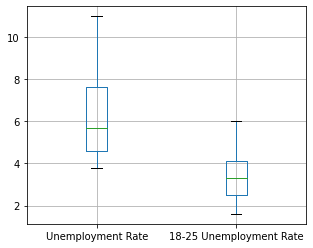

In [4]:
unemp = df[['Area_name',
            'Unemployment_rate_(2015)',
            'Youth_Unemployment_(claimant)_rate_18-24_(Dec-15)']]
unemp = unemp.rename(columns={'Area_name':'Borough',
                              'Unemployment_rate_(2015)':'Unemployment Rate',
                              'Youth_Unemployment_(claimant)_rate_18-24_(Dec-15)':'18-25 Unemployment Rate'})
unemp.boxplot(column=['Unemployment Rate',
                      '18-25 Unemployment Rate'],
              figsize=(5,4))
#unemp.set_index('Borough', inplace = True)
#unemp[0:]

### Employment Boxplot

<AxesSubplot:>

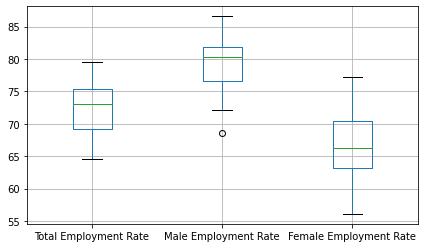

In [5]:
emp = df[['Area_name',
          'Employment_rate_(%)_(2015)',
          'Male_employment_rate_(2015)',
          'Female_employment_rate_(2015)']]
emp = emp.rename(columns={'Area_name':'Borough',
                          'Employment_rate_(%)_(2015)':'Total Employment Rate',
                          'Male_employment_rate_(2015)':'Male Employment Rate',
                          'Female_employment_rate_(2015)':'Female Employment Rate'})
emp.boxplot(column=['Total Employment Rate',
                    'Male Employment Rate',
                    'Female Employment Rate'],
            figsize=(7,4))
#emp.set_index('Borough', inplace = True)
#emp[0:]

# Employment/Unemployment Simple Regression

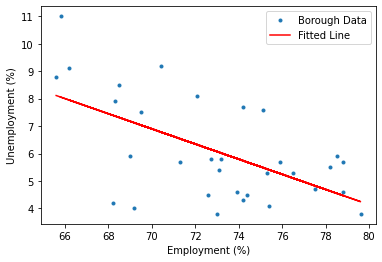

y = -0.276 x + 26.222
Rsq =  0.3478
p-value =  0.0004


In [45]:
# exclude City of London due to missing value
x = emp['Total Employment Rate'][1:]
y = unemp['Unemployment Rate'][1:]

plt.xlabel('Employment (%)')
plt.ylabel('Unemployment (%)')

a = plt.plot(x, y, '.', label='Borough Data')

slope, intercept, r_value, p_value, std_err = sps.linregress(x, y)

b = plt.plot(x, x*slope + intercept, 'r', label = 'Fitted Line')

plt.legend()
plt.show()

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", round(r_value**2,4))
print("p-value = ", round(p_value,4))